# Time Discrete Approximation of Deterministic Differential Equations

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import warnings
warnings.simplefilter("ignore")

def euler_method(a,x0,delta):
    t =[delta*x for x in range(int(1/delta)+1)]
    y =[x0]
    for tn in t[:-1]:
        y.append(y[-1]+a(tn,y[-1])*delta)
    return [t,y]


## PC-Exercise 8.1.1
  Apply the Euler method (1.2) to the VIP $\frac{dx}{dt} = -5x , x(0) = 1$, with $\Delta = 2^{-3} ,2^{-5}$ over $0 \le t \le 1$

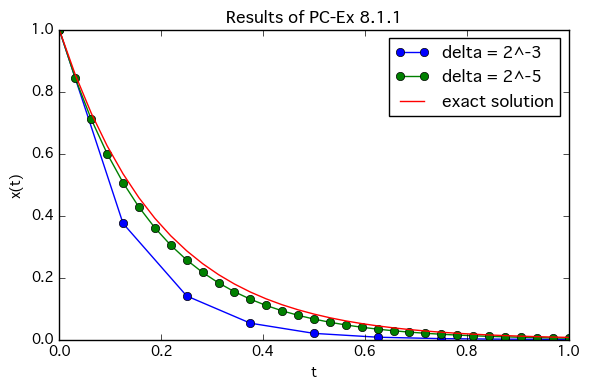

In [2]:
def a811(t,x):
    return -5*x

plt.title("Results of PC-Ex 8.1.1")
plt.xlabel("t")
plt.ylabel("x(t)")

ans1 = euler_method(a811,1.0,2**(-3))
ans2 = euler_method(a811,1.0,2**(-5))

exact_x = [x*(2**(-5)) for x in range(2**5 + 1)]
exact_y = [math.exp(-5*x) for x in exact_x]

plt.plot(ans1[0],ans1[1],"-o",label="delta = 2^-3")
plt.plot(ans2[0],ans2[1],"-o",label="delta = 2^-5")
plt.plot(exact_x,exact_y ,label = "exact solution")
plt.legend()
plt.show()
plt.close()

## PC-Exercise 8.1.2
For the IVP in PC-Exercise 8.1.2 calculate the global discretization error at time = 1 for the Euler method with time steps of equal length $\Delta = 1,2^{-1},2^{-2},\cdots,2^{-13}$,rounding off to $5$ singnificant digits.Plot the logarithm to the base 2 of these error against $\log_2 \Delta$ and determine the slope of the resulting curve.

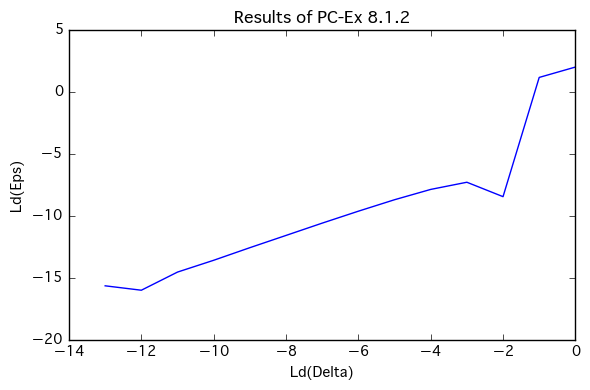

In [3]:
def roundoff(x,i=5):
    return float(format(x,'.' + str(i) + 'g'))

def euler_method_round(a,x0,delta):
    t =[roundoff(delta*x) for x in range(int(1/delta)+1)]
    y =[x0]
    for tn in t[:-1]:
        y.append(roundoff(y[-1]+a(tn,y[-1])*delta))
    return [t,y]


plt.title("Results of PC-Ex 8.1.2")
plt.xlabel("Ld(Delta)")
plt.ylabel("Ld(Eps)")
x=[i for i in range(0,-14,-1)]

from math import fabs,exp,log 
error = lambda i : fabs(exp(-5*euler_method_round(a811,1.0,2**i)[0][-1])
                        - euler_method_round(a811,1.0,2**i)[1][-1])
y=[log(roundoff(error(i)),2) for i in range(0,-14,-1)]
plt.plot(x,y)
plt.show()    
plt.close()


## PC-Exercise 8.1.3
Repeat PC-Exercise 8.1.2 with the usual arithmetic of the PC for the  modified trapezoidal method  (1.12). Compare the results with those for the Euler method.

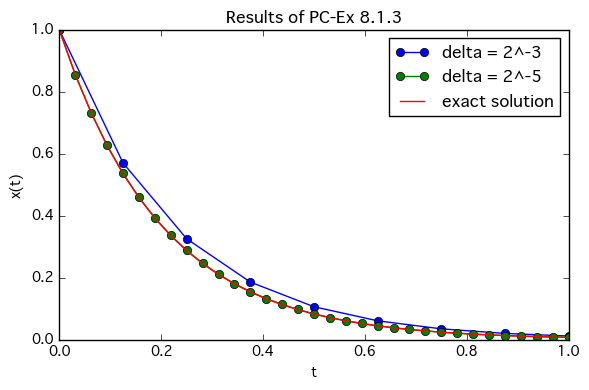

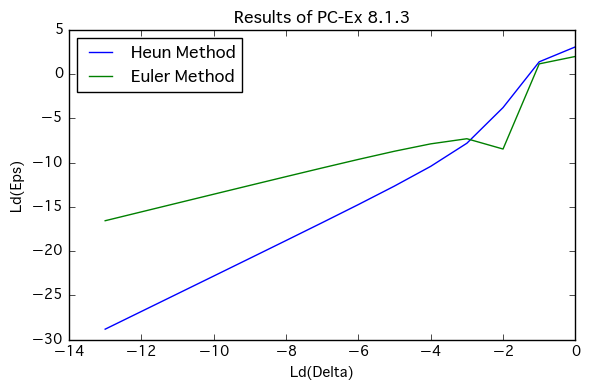

In [4]:
def heun_method(a,x0,delta):
    t =[delta*x for x in range(int(1/delta)+1)]
    y =[x0]
    for tn in t[:-1]:
        y_ = y[-1]+a(tn,y[-1])*delta
        y.append(y[-1]+(a(tn,y[-1])+a(tn,y_))/2*delta)
    return [t,y]

plt.title("Results of PC-Ex 8.1.3")
plt.xlabel("t")
plt.ylabel("x(t)")

ans1 = heun_method(a811,1.0,2**(-3))
ans2 = heun_method(a811,1.0,2**(-5))

exact_x = [x*(2**(-5)) for x in range(2**5 + 1)]
exact_y = [math.exp(-5*x) for x in exact_x]

plt.plot(ans1[0],ans1[1],"-o",label="delta = 2^-3")
plt.plot(ans2[0],ans2[1],"-o",label="delta = 2^-5")
plt.plot(exact_x,exact_y ,label = "exact solution")
plt.legend()
plt.show()
plt.close()

plt.title("Results of PC-Ex 8.1.3")
plt.xlabel("Ld(Delta)")
plt.ylabel("Ld(Eps)")
x=[i for i in range(0,-14,-1)]

from math import fabs,exp,log 

error = lambda i : fabs(exp(-5*heun_method(a811,1.0,2**i)[0][-1])
                        - heun_method(a811,1.0,2**i)[1][-1])
heun_y=[log(error(i),2) for i in range(0,-14,-1)]

error = lambda i : fabs(exp(-5*euler_method(a811,1.0,2**i)[0][-1])
                        - euler_method(a811,1.0,2**i)[1][-1])
euler_y=[log(error(i),2) for i in range(0,-14,-1)]

plt.plot(x,heun_y,label="Heun Method")
plt.plot(x,euler_y,label="Euler Method")
plt.legend(loc="upper left")

plt.show()    
plt.close()

## PC-Exercise 8.1.5
Repeat PC-Exercise 8.1.3 using the 3-step Adams-Bashford method (1.14) with the Heun method (1.12) as its starting routine.


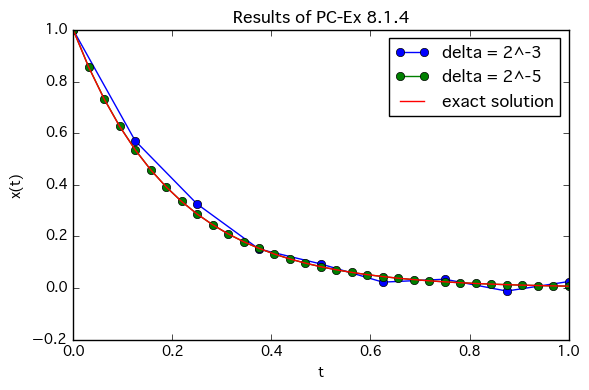

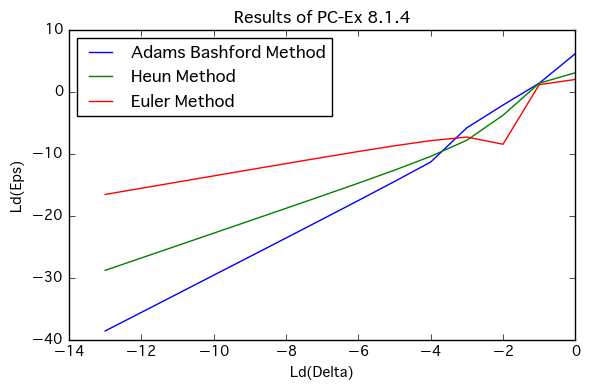

In [5]:
def adams_bashford_method(a,x0,delta):
    t =[delta*x for x in range(int(1/delta)+1)]
    y =[x0]
    for tn in t[:2]:
        y_ = y[-1]+a(tn,y[-1])*delta
        y.append(y[-1]+(a(tn,y[-1])+a(tn,y_))/2*delta)
    
    for tn in t[2:-1]:
        y.append(y[-1] + (23*a(tn,y[-1]) - 16*a(tn-delta,y[-2]) +  5*a(tn-2*delta,y[-3]))/12 *delta)

    return [t,y]

plt.title("Results of PC-Ex 8.1.4")
plt.xlabel("t")
plt.ylabel("x(t)")

ans1 = adams_bashford_method(a811,1.0,2**(-3))
ans2 = adams_bashford_method(a811,1.0,2**(-5))

exact_x = [x*(2**(-5)) for x in range(2**5 + 1)]
exact_y = [math.exp(-5*x) for x in exact_x]

plt.plot(ans1[0],ans1[1],"-o",label="delta = 2^-3")
plt.plot(ans2[0],ans2[1],"-o",label="delta = 2^-5")
plt.plot(exact_x,exact_y ,label = "exact solution")
plt.legend()
plt.show()
plt.close()

plt.title("Results of PC-Ex 8.1.4")
plt.xlabel("Ld(Delta)")
plt.ylabel("Ld(Eps)")
x=[i for i in range(0,-14,-1)]

from math import fabs,exp,log 
error = lambda i : fabs(exp(-5*adams_bashford_method(a811,1.0,2**i)[0][-1])
                        - adams_bashford_method(a811,1.0,2**i)[1][-1])
adams_bashford_y=[log(error(i),2) for i in range(0,-14,-1)]

error = lambda i : fabs(exp(-5*heun_method(a811,1.0,2**i)[0][-1])
                        - heun_method(a811,1.0,2**i)[1][-1])
heun_y=[log(error(i),2) for i in range(0,-14,-1)]

error = lambda i : fabs(exp(-5*euler_method(a811,1.0,2**i)[0][-1])
                        - euler_method(a811,1.0,2**i)[1][-1])
euler_y=[log(error(i),2) for i in range(0,-14,-1)]

plt.plot(x,adams_bashford_y,label="Adams Bashford Method")
plt.plot(x,heun_y,label="Heun Method")
plt.plot(x,euler_y,label="Euler Method")

plt.legend(loc="upper left")

plt.show()    
plt.close()

## PC-Exercise 8.1.7
Compare the error of the Euler and Richardson extrapolation approximations of x(1) for the solution of the initial value problem 


$\frac{dx}{dt} = -x , \ x(0) = 1$


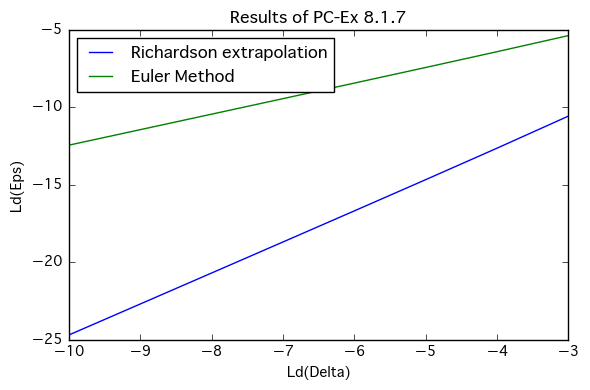

In [6]:
def a817(t,x):
    return -x

def richardson_extrapolation(a,x0,delta,method):
    yN = method(a,x0,delta)[1][-1]
    y2N = method(a,x0,delta/2)[1][-1]
    return 2*y2N - yN


plt.title("Results of PC-Ex 8.1.7")
plt.xlabel("Ld(Delta)")
plt.ylabel("Ld(Eps)")
x=[i for i in range(-3,-11,-1)]


error = lambda i : fabs(exp(-1) - euler_method(a817,1.0,2**i)[1][-1])
euler_y=[log(error(i),2) for i in range(-3,-11,-1)]

error = lambda i : fabs(exp(-1) - richardson_extrapolation(a817,1.0,2**i,euler_method))
richardson_y =[log(error(i),2) for i in range(-3,-11,-1)]

plt.plot(x,richardson_y,label="Richardson extrapolation")
plt.plot(x,euler_y,label="Euler Method")

plt.legend(loc="upper left")

plt.show()    
plt.close()


## PC-Exercise 8.2.1

Use the 2nd order truncated Taylor method (1.2) with equal length time  steps $\Delta = 2^{-3},2^{-2},\cdots,2^{-10}$ to calculate approximations to the solution $ x(t) = 2/(1+e^{-t^2})$ of the initial value problem

$ \frac{dx}{dt} = tx(2-x) , \ \ x(0) = -1$
over the interval $0 \le t \le 0.5$. Repeat the calculations using the 3nd order truncated Taylor method (2.4). Plot $\log_2$ of the global discretization error at time = 0.5 against $\log_2 \Delta$


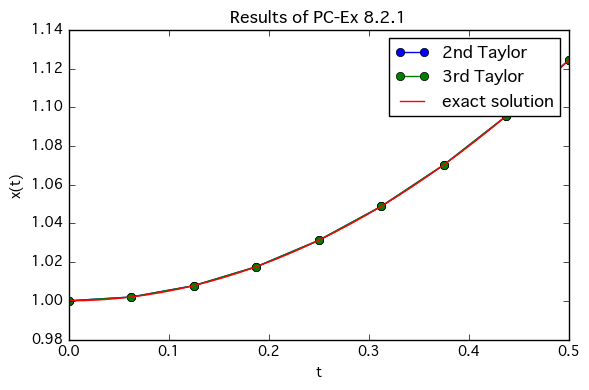

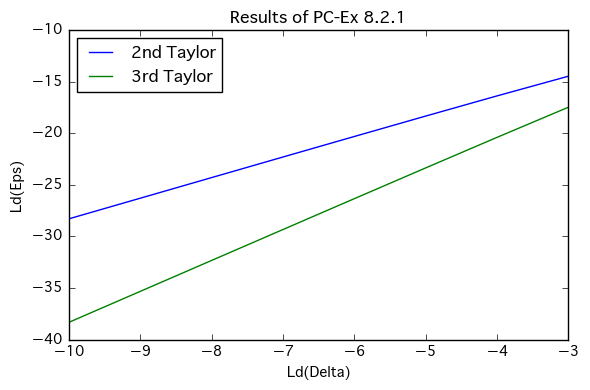

In [7]:
def a821(t,x):
    return t*x*(2-x)

def sol821(t):
    return 2/(1+exp(-(t**2)))

def a_t821(t,x):
    return x*(2-x)

def a_x821(t,x):
    return 2*t*(1-x)

def a_tt821(t,x):
    return 0

def a_tx821(t,x):
    return 2-2*x

def a_xx821(t,x):
    return -2*t

def taylor_2nd(x0,t,a,a_t,a_x):
    y =[x0]
    delta = t[1]-t[0]
    for tn in t[:-1]:
        y.append(y[-1]+a(tn,y[-1])*delta + (a_t(tn,y[-1])+a_x(tn,y[-1])*a(tn,y[-1]))*delta*delta/2)
    return [t,y]
    
def taylor_3rd(x0,t,a,a_t,a_x,a_tt,a_tx,a_xx):
    y =[x0]
    delta = t[1]-t[0]
    for tn in t[:-1]:
        y.append(y[-1]+
                 a(tn,y[-1])*delta + 
                 (a_t(tn,y[-1])+a_x(tn,y[-1])*a(tn,y[-1]))*delta*delta/2 + 
                (a_tt(tn,y[-1])+2*a_tx(tn,y[-1])*a(tn,y[-1])+a_xx(tn,y[-1])*a(tn,y[-1])*a(tn,y[-1]) + a_t(tn,y[-1])*a_x(tn,y[-1])
                 + a_x(tn,y[-1])*a_x(tn,y[-1])*a(tn,y[-1]))*delta*delta*delta/6)
        
    return [t,y]

plt.title("Results of PC-Ex 8.2.1")
plt.xlabel("t")
plt.ylabel("x(t)")

delta = 2**(-4)
t =[delta*x for x in range(int(0.5/delta)+1)]
ans1 = taylor_2nd(1.0,t,a821,a_t821,a_x821)
ans2 = taylor_3rd(1.0,t,a821,a_t821,a_x821,a_tt821,a_tx821,a_xx821)

exact_x = [x*(2**(-6)) for x in range(2**5 + 1)]
exact_y = [sol821(x) for x in exact_x]

plt.plot(ans1[0],ans1[1],"-o",label="2nd Taylor")
plt.plot(ans2[0],ans2[1],"-o",label="3rd Taylor")
plt.plot(exact_x,exact_y ,label = "exact solution")
plt.legend()
plt.show()
plt.close()

plt.title("Results of PC-Ex 8.2.1")
plt.xlabel("Ld(Delta)")
plt.ylabel("Ld(Eps)")
x=[i for i in range(-3,-11,-1)]

error = lambda i : fabs(sol821(0.5)  - taylor_2nd(1.0,list(np.linspace(0,0.5,2**(-i)+1)),a821,a_t821,a_x821)[1][-1])
taylor_2nd_error = [log(error(i),2) for i in x]

error = lambda i : fabs(sol821(0.5)  - taylor_3rd(1.0,list(np.linspace(0,0.5,2**(-i)+1)),a821,a_t821,a_x821,a_tt821,a_tx821,a_xx821)[1][-1])
taylor_3rd_error = [log(error(i),2) for i in x]

plt.plot(x,taylor_2nd_error,label="2nd Taylor")
plt.plot(x,taylor_3rd_error,label="3rd Taylor")

plt.legend(loc="upper left")

plt.show()    
plt.close()


## PC-Exercise 8.2.2
Repeat PC-Exercise 8.2.1 using the 4th order Runge-Kutta method(2.8) with equal length time steps $\Delta = 2^{-2} , \cdots , 2^{-7}$


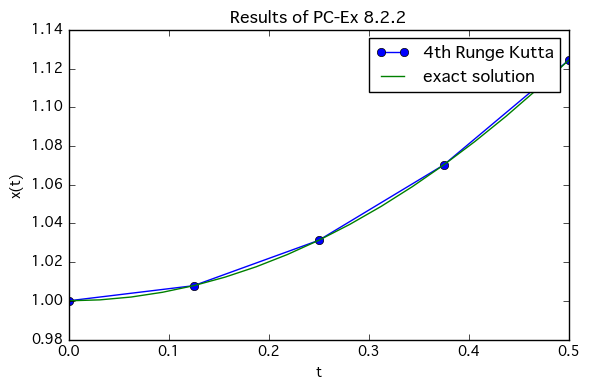

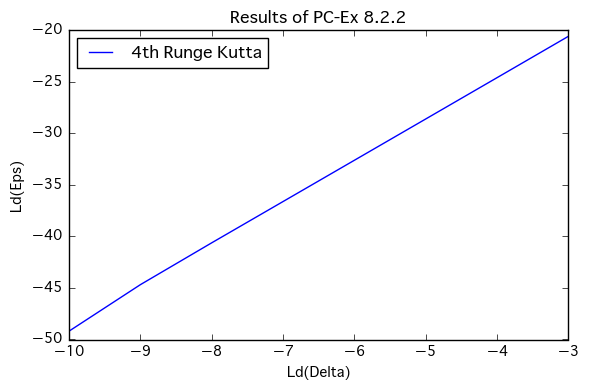

In [8]:
def runge_kutta_4th(x0,t0,tn,delta,a):
    t = list(np.arange(t0,tn+delta,delta))
    y = [x0]
    for tn in t[:-1]:
        k1 = a(tn,y[-1])
        k2 = a(tn+delta/2, y[-1]+k1*delta/2)
        k3 = a(tn+delta/2, y[-1]+k2*delta/2)
        k4 = a(tn+delta, y[-1]+k3*delta)
        y.append(y[-1]+(k1+2*k2+2*k3+k4)*delta/6)
        
    return[t,y]

plt.title("Results of PC-Ex 8.2.2")
plt.xlabel("t")
plt.ylabel("x(t)")


ans1 = runge_kutta_4th(1.0,0,0.5,2**(-3),a821)
exact_x =  list(np.arange(0,0.5+2**(-5),2**(-5)))
exact_y = [sol821(x) for x in exact_x]

plt.plot(ans1[0],ans1[1],"-o",label="4th Runge Kutta")
plt.plot(exact_x,exact_y ,label = "exact solution")
plt.legend()
plt.show()
plt.close()

plt.title("Results of PC-Ex 8.2.2")
plt.xlabel("Ld(Delta)")
plt.ylabel("Ld(Eps)")
x=[i for i in range(-3,-11,-1)]

error = lambda i : fabs(sol821(0.5)  - runge_kutta_4th(1.0,0,0.5,2**(i),a821)[1][-1])
runge_kutta_4th_error = [log(error(i),2) for i in x]

plt.plot(x,runge_kutta_4th_error,label="4th Runge Kutta")

plt.legend(loc="upper left")

plt.show()    
plt.close()


## PC-Exercise 8.2.3
Calculate the discretiztion errors in using the Euler method (1.2) and the midpoint method (2.10) started with the Euler method to approximate the solution $x(t) = 2/3 e^{-3t} + 1/3$ of the initial value problem

$
\frac{dx}{dt} = -3x + 1 , \ x(0) = 1
$
over the interval $0 \le t \le 1$.Use time steps of equal length $\Delta = 0.1$ and plot on x versus t axes


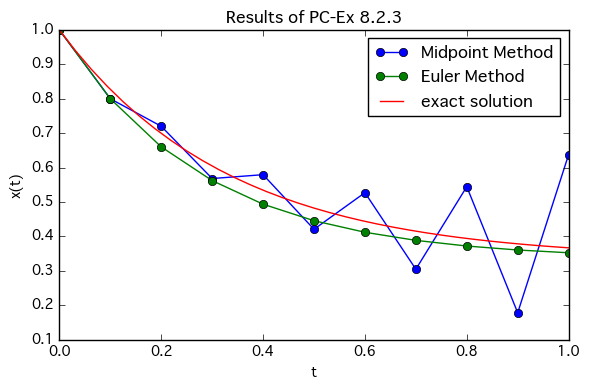

In [9]:
def a823(t,x):
    return (-3)*x +1 

def sol823(t):
    return 2*exp((-3)*t)/3 + 1/3

def midpoint_method(x0,t0,t1,delta,a):
    t = list(np.arange(t0,t1+delta,delta))
    y = [x0,x0+a(t[0],x0)*delta]
    
    for tn in t[1:-1]:
            y.append(y[-2]+2*a(tn,y[-1])*delta)
    
    return[t,y]

plt.title("Results of PC-Ex 8.2.3")
plt.xlabel("t")
plt.ylabel("x(t)")

ans1 = midpoint_method(1,0,1,0.1,a823)
ans2 = euler_method(a823,1.0,0.1)

exact_x = [x*(2**(-5)) for x in range(2**5 + 1)]
exact_y = [sol823(x) for x in exact_x]

plt.plot(ans1[0],ans1[1],"-o",label="Midpoint Method")
plt.plot(ans2[0],ans2[1],"-o",label="Euler Method")
plt.plot(exact_x,exact_y ,label = "exact solution")
plt.legend()
plt.show()
plt.close()


## PC-Exercise 8.2.3
Calculate 300 iterates of $ y_{n+1} = \frac{\pi}{3} y_n $ with initial value y_0 = 0.1 using the prescribed arithmetic of the PC, at each step
rounding the value of$ y_{n+1}$ obtained to four siginificant figures. Plot the relative frequencies of the roundoff errors in histogram on the interval $[-5 \times 10^{-5} , 5 \times 10^{-5}]$ using 40 equal subintervals.


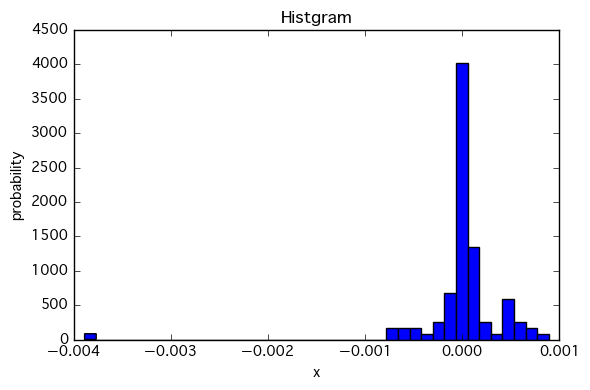

In [10]:
#合ってるか分からない

y = [0.1]
e = []
for i in range(100):
    ans = y[-1]*math.pi/3
    ans_ = roundoff(roundoff(y[-1],4)*math.pi/3,4)
    y.append(ans)
    e.append(ans-ans_)

plt.hist(e, normed = True,bins=40)
plt.title("Histgram")
plt.xlabel("x")
plt.ylabel("probability")
plt.show()

## PC-Exercise 8.4.2
Use the Euler method with equal time steps $\Delta = 2^{-2}$ for the differential equation
$\frac{dx}{dt} = x$
over the interval $0 \le t \le 1$  with $ N = 10^3$ different initial values $x(0)$ between 0.4 and 0.6. Use both four significant figure arithmetic and the prescribed arithmetic of the PC and determine the final accumulative roundoff error $R_{1/\Delta}$ in each case, plotting them in a histogram on the interval $[-5 \times 10^{-4} , 5\times 10^{-4}]$ with 40 equal subintervals. In addition, calculate the sample mean and sample
variance of the $R_{1/\Delta}$

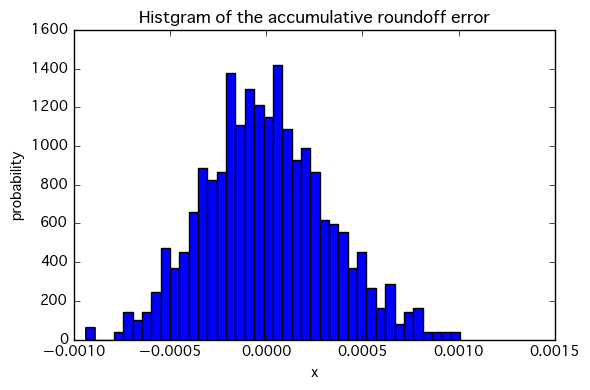

the sample mean: 1.025e-06
the standard deviation: 0.000324287304659


In [11]:
x1 = 0.4
x2 = 0.6
t0 = 0
t1 = 1
N = 10**3
delta = 2**(-2)
R = []
x0s = list(np.linspace(x1,x2,N))
a = lambda t,x : x

for x0 in x0s:
    r = 0
    t = list(np.arange(t0,t1+delta,delta))
    y =[x0]
    y_ = [x0]
    for tn in t[:-1]:
        y.append(y[-1]+a(tn,y[-1])*delta)
        y_.append(roundoff(y_[-1],4)+roundoff(a(tn,y_[-1])*delta,4))
        r = r + y[-1] - y_[-1]
    R.append(r)

plt.hist(R, normed = True,bins=40)
plt.title("Histgram of the accumulative roundoff error")
plt.xlabel("x")
plt.ylabel("probability")
plt.show()
print("the sample mean: " + str(np.mean(R)))
print("the standard deviation: " + str(np.std(R)))



## PC-Exercise 8.4.3
Repeat PC-Exercise 8.4.2 with N = 200
and with time steps $\Delta = 2^{-2} , 2^{-3} , 2^{-4} and,\  2^{-5} $, determining $R_{1/\Delta}$  in each
case. Plot the 90% confidence intervals for the mean value of the error against $\Delta$

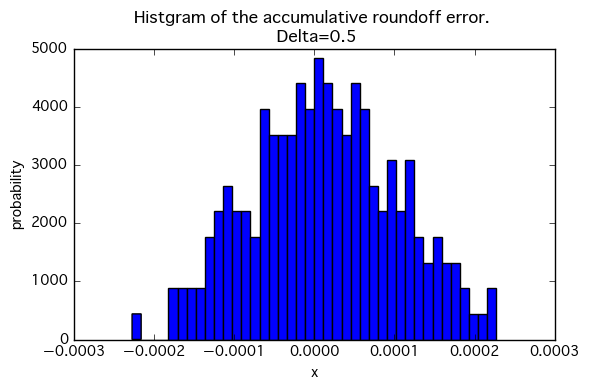

the sample mean: 1.20000000001e-05
the standard deviation: 9.11083070751e-05


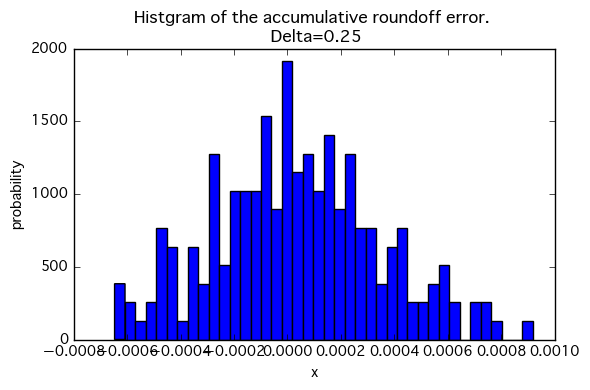

the sample mean: 3.41250000001e-05
the standard deviation: 0.000312282987337


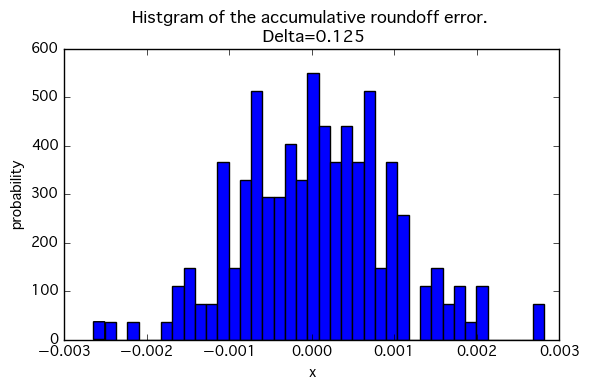

the sample mean: 5.94127765657e-05
the standard deviation: 0.000922845423741


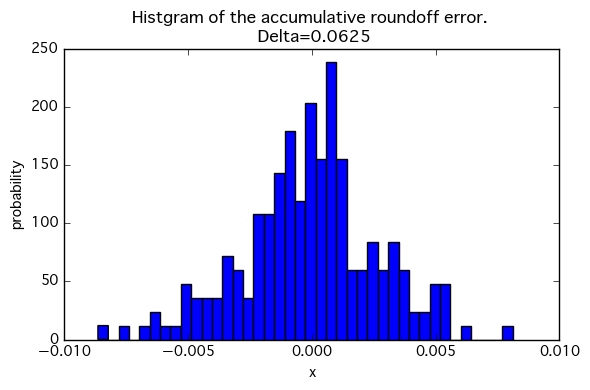

the sample mean: -0.000101172383901
the standard deviation: 0.00274883149193


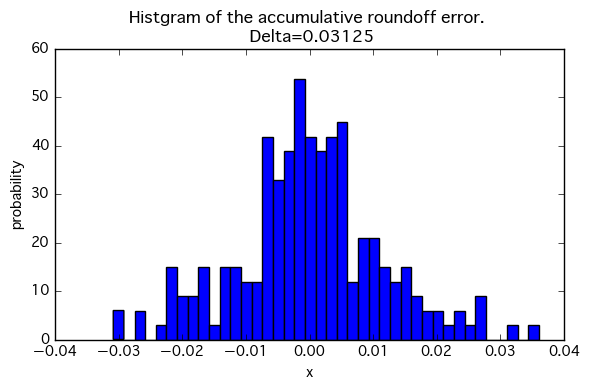

the sample mean: -3.73152599851e-05
the standard deviation: 0.011533389933


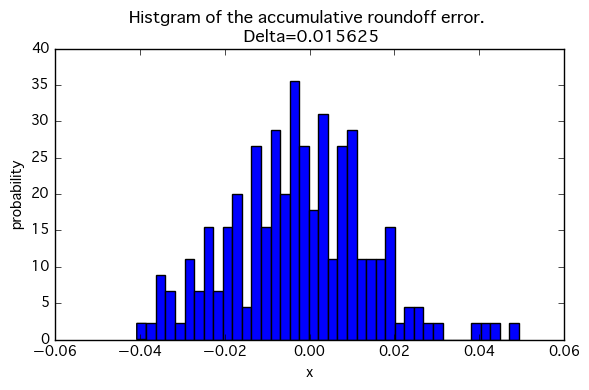

the sample mean: -0.00284901663429
the standard deviation: 0.0161027490365


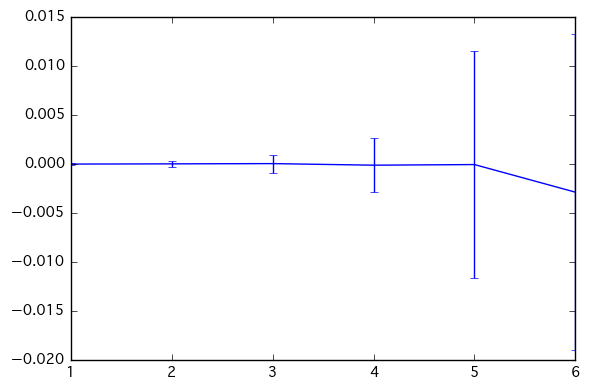

In [12]:
x1 = 0.4
x2 = 0.6
t0 = 0
t1 = 1
N = 200
D = [2**(-1),2**(-2),2**(-3),2**(-4),2**(-5),2**(-6)]
x0s = list(np.linspace(x1,x2,N))
a = lambda t,x : x
M =[]
E =[]
for delta in D:
    R = []
    for x0 in x0s:
        r = 0
        t = list(np.arange(t0,t1+delta,delta))
        y =[x0]
        y_ = [x0]
        for tn in t[:-1]:
            y.append(y[-1]+a(tn,y[-1])*delta)
            y_.append(roundoff(y_[-1],4)+roundoff(a(tn,y_[-1])*delta,4))
            r  = r + y[-1] - y_[-1]
        R.append(r)

    plt.hist(R, normed = True,bins=40)
    plt.title("Histgram of the accumulative roundoff error. \n Delta=" + str(delta))
    plt.xlabel("x")
    plt.ylabel("probability")
    plt.show()
    plt.close()
    M.append(np.mean(R))
    E.append(np.std(R))
    print("the sample mean: " + str(np.mean(R)))
    print("the standard deviation: " + str(np.std(R)))
    

x = [1,2,3,4,5,6]
plt.errorbar(x,M,yerr=E)
plt.show()
plt.close()